In [122]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
#reading the csv
ratings= pd.read_csv("beer_data.csv")

In [124]:
# performing basic checks
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [125]:
ratings.shape

(475984, 3)

In [126]:
ratings.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [127]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [128]:
new_ratings= pd.DataFrame(ratings.groupby(["beer_beerid"]).count().reset_index().sort_values('review_overall', ascending=False))

In [129]:
new_ratings.head()

,beer_beerid,review_profilename,review_overall
1574,2093,987,987
338,412,975,976
1427,1904,904,905
818,1093,848,848
78,92,818,818


In [130]:
new_ratings.describe()

,beer_beerid,review_profilename,review_overall
count,40308.000000,40308.000000,40308.000000
mean,36971.524561,11.806192,11.808673
std,22544.537693,42.084404,42.095425
min,3.000000,0.000000,1.000000
25%,16878.750000,1.000000,1.000000
50%,37362.000000,2.000000,2.000000
75%,56232.250000,5.000000,5.000000
max,77317.000000,987.000000,987.000000


In [131]:
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40308 entries, 1574 to 40307
Data columns (total 3 columns):
beer_beerid           40308 non-null int64
review_profilename    40308 non-null int64
review_overall        40308 non-null int64
dtypes: int64(3)
memory usage: 1.2 MB


In [132]:
new_ratings.shape

(40308, 3)

In [133]:
# checking for mean and median to filter the data 
print(new_ratings['review_overall'].mean())
print(new_ratings['review_overall'].median())


11.808673216234991
2.0


In [134]:
new_ratings = new_ratings.rename(columns={'beer_beerid': 'beer_id'})


In [135]:
new_ratings= new_ratings.astype({'beer_id' : str})
new_ratings.head()


,beer_id,review_profilename,review_overall
1574,2093,987,987
338,412,975,976
1427,1904,904,905
818,1093,848,848
78,92,818,818


In [136]:
new_ratings.shape

(40308, 3)

In [137]:
#plt.figure(figsize=(50, 70))
#plt.plot( new_ratings['beer_id'], new_ratings['review_overall'])
#plt.xlabel('beer_id')
#plt.ylabel('review_overall')

# my system is not able to plot the 40308 X 40308 data points, 
#do not have that kind of processing power so filtering out data points and then trying to plot

In [138]:
new_ratings= new_ratings.loc[new_ratings.review_overall>new_ratings['review_overall'].mean()]

In [139]:
new_ratings.shape

(6157, 3)

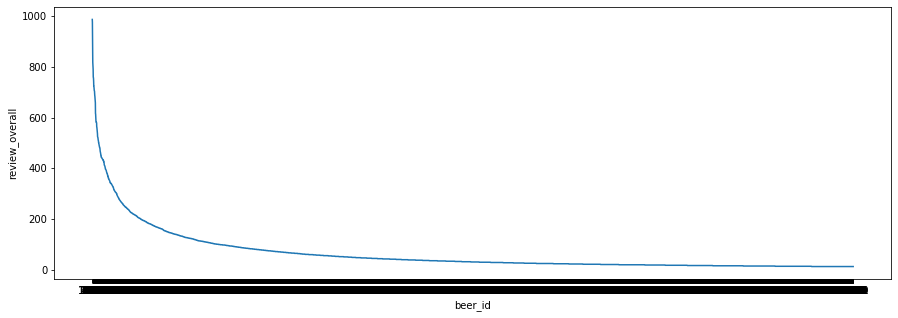

In [140]:

plt.figure(figsize=(15, 5))
plt.plot( new_ratings['beer_id'], new_ratings['review_overall'])
plt.xlabel('beer_id')
plt.ylabel('review_overall')
plt.show()

In [141]:
# looking at the above plot i can see that most of the beers have less that 100 reviews, 
# I am choosing the value of N as 100 

In [142]:
final_list= new_ratings.loc[new_ratings.review_overall>=100]

In [143]:
final_list.shape

(1020, 3)

In [144]:
list_of_beer= final_list['beer_id'].tolist()

In [147]:
# filtering out beer_id with more than or equal to 100 reviews
df_1= ratings.loc[ratings.beer_beerid.isin(list_of_beer)]

In [148]:
df_1.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0


In [149]:
df_1.shape

(223345, 3)

In [151]:
# dropping duplicates
df_1=df_1.drop_duplicates(subset=None, keep='first', inplace=False)

In [152]:
df_1.shape

(222988, 3)

In [153]:
#What are the unique values of ratings?
df_2=pd.DataFrame(df_1.pivot_table(values='beer_beerid', index='review_overall', aggfunc='count'))


In [155]:
df_2.head(10)

,beer_beerid
review_overall,
1.0,1230
1.5,1401
2.0,4249
2.5,6335
3.0,19005
3.5,36748
4.0,83516
4.5,53528
5.0,16976


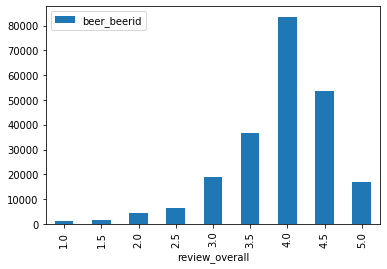

In [156]:
df_2.plot.bar()

Visualise the rating values and notice:

The average beer ratings

The average user ratings

The average number of ratings given to the beers

The average number of ratings given by the users

In [157]:
#The average beer ratings
df_3=pd.DataFrame(df_1.pivot_table(values='review_overall', index='beer_beerid', aggfunc='mean').sort_values(by='review_overall', ascending=False))

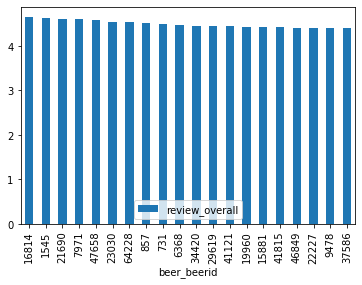

In [158]:
df_3.head(20).plot.bar()

In [159]:
#The average user ratings
df_4=pd.DataFrame(df_1.pivot_table(values='review_overall', index='review_profilename', aggfunc='mean').sort_values(by='review_overall', ascending=False))

In [160]:
df_4.head(20)

,review_overall
review_profilename,
zzajjber,5.0
DudleyRose,5.0
guinness72384,5.0
gusdabrew,5.0
gyllenegrrrl,5.0
Dutch1,5.0
harlanhu28,5.0
harperman69,5.0
havoc531,5.0


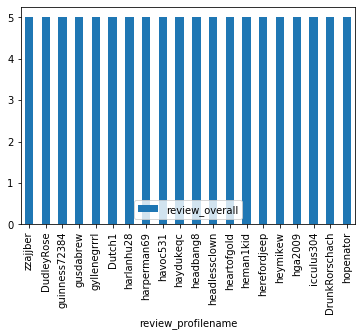

In [161]:
df_4.head(20).plot.bar()

In [162]:
#The average number of ratings given to the beers

df_5=pd.DataFrame(df_1.pivot_table(values='review_overall', index='beer_beerid', aggfunc='count').sort_values(by='review_overall', ascending=False))

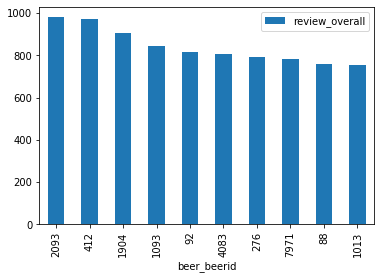

In [163]:
df_5.head(10).plot.bar()

In [164]:
#The average number of ratings given by the users
df_6=pd.DataFrame(df_1.pivot_table(values='review_overall', index='review_profilename', aggfunc='count').sort_values(by='review_overall', ascending=False))

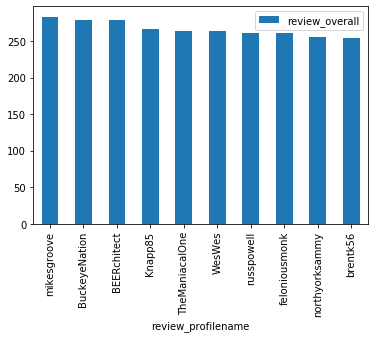

In [165]:
df_6.head(10).plot.bar()

In [166]:
df_1.head(10)

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0
105,10784,Jayli,4.0
106,10784,clayrock81,4.0
107,10784,beerphan,4.0
108,10784,OWSLEY069,3.0
109,10784,AEK,4.0


## dividing the data into train and test

In [55]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df_1, test_size=0.30, random_state=0)

In [56]:
print(train.shape)
print(test.shape)

(156091, 3)
(66897, 3)


In [167]:
# creating pivot
df_beer = train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(0)

In [168]:
df_beer.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
dummy_train = train.copy()
dummy_test = test.copy()

In [170]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [171]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(0)

In [172]:
dummy_train.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0runkp0s,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [173]:
dummy_test.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# user similarity matrix

## using cosine similarity

In [174]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [175]:
user_correlation.shape

(15876, 15876)

## using adjusted cosine

In [176]:
beer_id_df= train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

In [177]:
beer_id_df.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#Normalising the rating of the beer for each user aroung 0 mean

mean = np.nanmean(beer_id_df, axis=1)
df_subtracted = (beer_id_df.T-mean).T

In [179]:
df_subtracted.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
#finding cosine similarity 
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# prediction

In [181]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
user_predicted_ratings = np.dot(user_correlation, beer_id_df.fillna(0))
user_predicted_ratings

array([[1.49560572, 3.50430158, 2.03200303, ..., 3.25740227, 7.17188618,
        2.46694242],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.09845872, 4.37816876, 2.2589668 , ..., 2.18231624, 5.07423154,
        1.84513466],
       ...,
       [2.264112  , 7.65778026, 5.32920447, ..., 1.45172554, 7.29116167,
        3.90364847],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [183]:
user_predicted_ratings.shape

(15876, 1020)

In [184]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.495606,3.504302,2.032003,3.198720,2.272567,3.966451,9.044543,4.855496,7.632125,12.643289,...,3.321714,1.622411,6.420137,1.452281,1.924704,5.183178,2.474698,3.257402,7.171886,2.466942
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,2.098459,4.378169,2.258967,3.066256,2.713838,2.660734,8.246486,3.124112,6.814295,11.652560,...,3.019936,1.899460,2.615725,1.947089,1.631028,3.019015,1.795618,2.182316,5.074232,1.845135
0beerguy0,0.852138,1.189252,1.687985,1.508393,0.114642,0.032190,1.217501,2.166081,3.185044,3.013724,...,0.000000,0.485649,0.809408,0.321960,0.034599,0.097750,0.547185,0.002285,0.020480,0.105583
0runkp0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Determine how similar the first 10 users are to each other and visualise it.


In [185]:
user_final_rating.iloc[:10].T.corr()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1099,1121987
review_profilename,,,,,,,,,,
0110x011,1.000000,NaN,0.691639,0.358319,NaN,0.713950,NaN,0.714027,0.521175,0.502240
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,0.691639,NaN,1.000000,0.415285,NaN,0.730499,NaN,0.693475,0.576094,0.545284
0beerguy0,0.358319,NaN,0.415285,1.000000,NaN,0.486664,NaN,0.503120,0.561862,0.499298
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,0.713950,NaN,0.730499,0.486664,NaN,1.000000,NaN,0.765506,0.634486,0.625124
1000Bottles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,0.714027,NaN,0.693475,0.503120,NaN,0.765506,NaN,1.000000,0.633638,0.588350
1099,0.521175,NaN,0.576094,0.561862,NaN,0.634486,NaN,0.633638,1.000000,0.653191


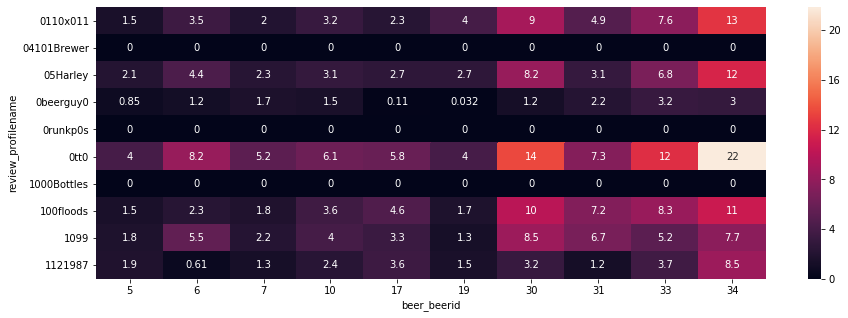

In [186]:
#select first 10 user and first 10 beers for better visualization
plt.figure(figsize=(15,5))
sns.heatmap(user_final_rating.iloc[:10, :10], annot= True)
plt.show()

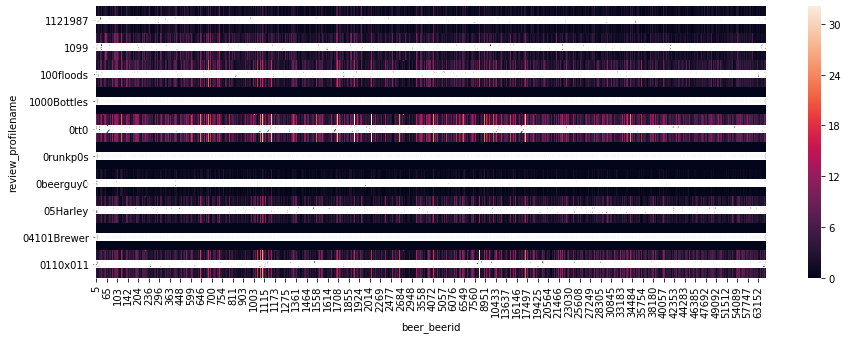

In [77]:
result= user_final_rating.iloc[:10].sort_values(by= 'review_profilename',ascending=False)
plt.figure(figsize=(15,5))
sns.heatmap(result, annot= True)
plt.show()

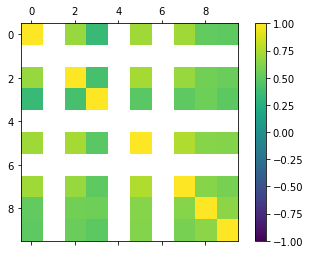

In [187]:
#similarity between first 10 user 
corr_results= user_final_rating.iloc[:10].T.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_results, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [188]:
corr_results

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1099,1121987
review_profilename,,,,,,,,,,
0110x011,1.000000,NaN,0.691639,0.358319,NaN,0.713950,NaN,0.714027,0.521175,0.502240
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,0.691639,NaN,1.000000,0.415285,NaN,0.730499,NaN,0.693475,0.576094,0.545284
0beerguy0,0.358319,NaN,0.415285,1.000000,NaN,0.486664,NaN,0.503120,0.561862,0.499298
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,0.713950,NaN,0.730499,0.486664,NaN,1.000000,NaN,0.765506,0.634486,0.625124
1000Bottles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,0.714027,NaN,0.693475,0.503120,NaN,0.765506,NaN,1.000000,0.633638,0.588350
1099,0.521175,NaN,0.576094,0.561862,NaN,0.634486,NaN,0.633638,1.000000,0.653191


# item based similarity 

In [189]:
beer_id_df= train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').T

In [190]:
beer_id_df.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1099,1121987,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
mean = np.nanmean(beer_id_df, axis=1)
df_subtracted = (beer_id_df.T-mean).T

In [192]:
df_subtracted.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1099,1121987,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -1.87949542e-02  2.02268478e-02 ...  6.31086200e-03
  -3.27899285e-03  1.67702172e-02]
 [-1.87949542e-02  1.00000000e+00  3.56644614e-02 ...  2.23701517e-03
  -6.46375268e-03  2.11620342e-03]
 [ 2.02268478e-02  3.56644614e-02  1.00000000e+00 ...  0.00000000e+00
   2.96359456e-02  8.41475289e-04]
 ...
 [ 6.31086200e-03  2.23701517e-03  0.00000000e+00 ...  1.00000000e+00
   1.14218634e-02 -4.84444542e-03]
 [-3.27899285e-03 -6.46375268e-03  2.96359456e-02 ...  1.14218634e-02
   1.00000000e+00  2.40257978e-02]
 [ 1.67702172e-02  2.11620342e-03  8.41475289e-04 ... -4.84444542e-03
   2.40257978e-02  1.00000000e+00]]


In [194]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 0.00000000e+00, 2.02268478e-02, ...,
        6.31086200e-03, 0.00000000e+00, 1.67702172e-02],
       [0.00000000e+00, 1.00000000e+00, 3.56644614e-02, ...,
        2.23701517e-03, 0.00000000e+00, 2.11620342e-03],
       [2.02268478e-02, 3.56644614e-02, 1.00000000e+00, ...,
        0.00000000e+00, 2.96359456e-02, 8.41475289e-04],
       ...,
       [6.31086200e-03, 2.23701517e-03, 0.00000000e+00, ...,
        1.00000000e+00, 1.14218634e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.96359456e-02, ...,
        1.14218634e-02, 1.00000000e+00, 2.40257978e-02],
       [1.67702172e-02, 2.11620342e-03, 8.41475289e-04, ...,
        0.00000000e+00, 2.40257978e-02, 1.00000000e+00]])

# prediction

In [195]:
item_predicted_ratings = np.dot((beer_id_df.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.14742094, 0.74655582, 0.60947521, ..., 0.56893095, 0.77410657,
        0.31120338],
       [0.        , 0.00953732, 0.11257881, ..., 0.05931782, 0.30699241,
        0.03241518],
       [0.10541131, 0.58978007, 0.70857484, ..., 0.38832474, 0.7028738 ,
        0.51852498],
       ...,
       [0.03018581, 0.18034646, 0.20183224, ..., 0.0527959 , 0.08639281,
        0.        ],
       [0.04888882, 0.        , 0.036993  , ..., 0.        , 0.02248743,
        0.15246811],
       [0.04874822, 0.02157263, 0.07280927, ..., 0.        , 0.09937852,
        0.        ]])

In [196]:
item_predicted_ratings.shape

(15876, 1020)

In [197]:
dummy_train.shape

(15876, 1020)

### finding the rating only for beers not rated by the user for recommendation

In [198]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.147421,0.746556,0.609475,0.461194,0.410388,0.471179,0.574746,0.250817,1.145389,0.496101,...,0.930589,0.876899,1.189165,1.106875,0.346905,0.873049,0.973891,0.568931,0.774107,0.311203
04101Brewer,0.000000,0.009537,0.112579,0.000000,0.000000,0.000000,0.000000,0.363949,0.000000,0.000000,...,0.018376,0.094037,0.008790,0.000000,0.183839,0.181445,0.000000,0.059318,0.306992,0.032415
05Harley,0.105411,0.589780,0.708575,0.488887,0.306366,0.328874,0.723077,0.614784,0.447076,0.541618,...,0.349520,0.214660,0.338306,0.778187,0.273448,0.879724,0.253447,0.388325,0.702874,0.518525
0beerguy0,0.171919,0.104247,0.120485,0.124462,0.118582,0.012203,0.179866,0.116659,0.117433,0.061547,...,0.031284,0.000000,0.000000,0.166034,0.000000,0.000000,0.045638,0.020578,0.000000,0.016662
0runkp0s,0.000000,0.181554,0.000000,0.000000,0.000000,0.110773,0.002924,0.000000,0.036938,0.000000,...,0.000000,0.048940,0.061406,0.000000,0.026251,0.000000,0.062021,0.098751,0.000000,0.000000


### Compute and visualise the similarity between the first 10 beers.

In [199]:
item_final_rating.iloc[:10,:10].T

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1099,1121987
beer_beerid,,,,,,,,,,
5,0.147421,0.000000,0.105411,0.171919,0.000000,0.123796,0.049619,0.427301,0.081407,0.025442
6,0.746556,0.009537,0.589780,0.104247,0.181554,0.458150,0.000000,0.478101,0.270909,0.019267
7,0.609475,0.112579,0.708575,0.120485,0.000000,0.255205,0.060455,0.882017,0.501196,0.001632
10,0.461194,0.000000,0.488887,0.124462,0.000000,0.444666,0.042646,0.149747,0.418807,0.074564
17,0.410388,0.000000,0.306366,0.118582,0.000000,0.197900,0.051608,0.320543,0.087267,0.105762
19,0.471179,0.000000,0.328874,0.012203,0.110773,0.207316,0.000000,0.447301,0.162463,0.140146
30,0.574746,0.000000,0.723077,0.179866,0.002924,0.187704,0.074092,0.986436,0.348184,0.048801
31,0.250817,0.363949,0.614784,0.116659,0.000000,0.191390,0.000000,0.657246,0.453866,0.269531
33,1.145389,0.000000,0.447076,0.117433,0.036938,0.562452,0.000491,0.625908,0.015245,0.043829


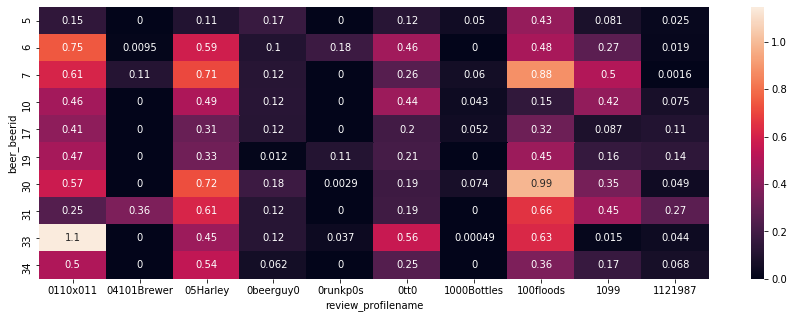

In [200]:
plt.figure(figsize=(15,5))
sns.heatmap(item_final_rating.iloc[:10, :10].T, annot= True)
plt.show()

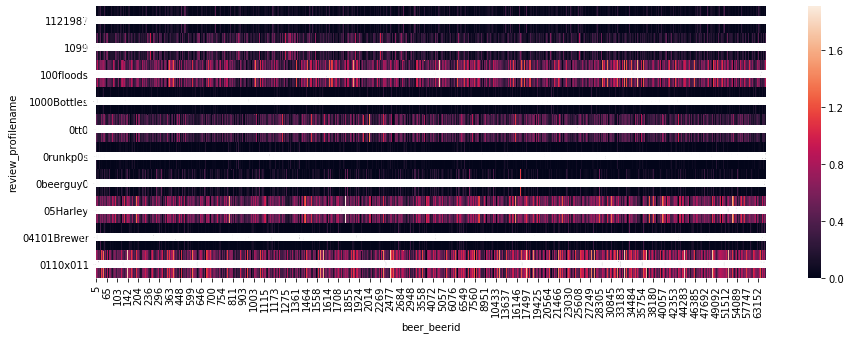

In [201]:
result= item_final_rating.iloc[:10].sort_values(by= 'review_profilename',ascending=False)
plt.figure(figsize=(15,5))
sns.heatmap(result, annot= True)
plt.show()

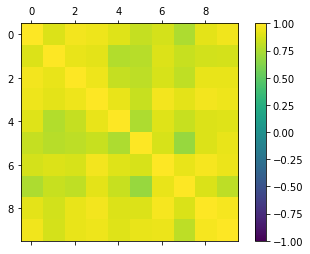

In [202]:
#similarity between first 10 beer , all the white boxes are NAN values 
corr_results= user_final_rating.iloc[:10,  :10].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_results, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [203]:
corr_results= user_final_rating.iloc[ :10,:10].corr()
corr_results 

beer_beerid,5,6,7,10,17,19,30,31,33,34
beer_beerid,,,,,,,,,,
5,1.000000,0.891716,0.961799,0.951133,0.902138,0.826853,0.873841,0.752947,0.915113,0.958053
6,0.891716,1.000000,0.932745,0.921515,0.766235,0.788044,0.897915,0.829699,0.866765,0.871153
7,0.961799,0.932745,1.000000,0.948133,0.822606,0.803282,0.878980,0.805999,0.931230,0.936616
10,0.951133,0.921515,0.948133,1.000000,0.930209,0.833149,0.961185,0.916861,0.961947,0.950432
17,0.902138,0.766235,0.822606,0.930209,1.000000,0.757704,0.900215,0.835705,0.891614,0.902299
19,0.826853,0.788044,0.803282,0.833149,0.757704,1.000000,0.881894,0.695085,0.894897,0.935453
30,0.873841,0.897915,0.878980,0.961185,0.900215,0.881894,1.000000,0.934062,0.969203,0.940294
31,0.752947,0.829699,0.805999,0.916861,0.835705,0.695085,0.934062,1.000000,0.888631,0.801678
33,0.915113,0.866765,0.931230,0.961947,0.891614,0.894897,0.969203,0.888631,1.000000,0.975273


# evaluation

In [204]:
#using user similarity
test_beer_df= test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')
mean = np.nanmean(test_beer_df, axis=1)
test_df_subtracted = (test_beer_df.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [205]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_df.fillna(0))
test_user_predicted_ratings

array([[0.27469825, 0.51992099, 1.13335106, ..., 0.26390576, 0.        ,
        0.37598523],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.03091079, 0.9279983 , 0.28176328, ..., 1.42192543, 4.07241937,
        6.41322631],
       ...,
       [0.10663627, 4.89692428, 1.49002665, ..., 0.        , 0.        ,
        0.00835306],
       [0.028197  , 0.25808197, 0.66806717, ..., 0.        , 0.47140452,
        0.        ],
       [0.37442949, 1.37368961, 0.90405039, ..., 0.        , 0.        ,
        0.        ]])

### Doing prediction for the beers rated by the user

In [206]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [207]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beers rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [208]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [209]:
test_ = test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

In [210]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [211]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.0524417929457632


## Using Item similarity

In [212]:
test_beer_df = test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').T

mean = np.nanmean(test_beer_df, axis=1)
test_df_subtracted = (test_beer_df.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [213]:
test_item_correlation.shape

(1020, 1020)

In [214]:
test_beer_df.shape

(1020, 11333)

In [215]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_df.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,17,19,30,31,33,34,...,63989,64089,64228,67044,67106,67219,68960,69363,72138,74986
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
test_ = test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

In [217]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [218]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)


1.6108303265868955


### based on the RMSE values the user similarity is producing the best results.

In [219]:
#Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [220]:
lt= ['cokes', 'genog' , 'giblet']
user_final_rating.loc[user_final_rating.index.isin(lt) ].T.agg(pd.Series.idxmax)

review_profilename
cokes      276
genog     1093
giblet    2093
dtype: int64

In [221]:
user_final_rating.loc[user_final_rating.index.isin(['cokes']) ].T.sort_values(by='cokes', ascending=False).head()

review_profilename,cokes
beer_beerid,
276,48.439510
412,43.719296
1093,43.404200
1904,43.228536
4083,41.615344


In [222]:
user_final_rating.loc[user_final_rating.index.isin(['genog']) ].T.sort_values(by='genog', ascending=False).head()

review_profilename,genog
beer_beerid,
1093,51.652982
412,49.703228
4083,47.116712
2093,42.925670
7971,40.880070


In [223]:
user_final_rating.loc[user_final_rating.index.isin(['giblet']) ].T.sort_values(by='giblet', ascending=False).head()

review_profilename,giblet
beer_beerid,
2093,64.279072
412,62.481779
1904,59.641967
355,58.150069
1093,56.962551
